# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle
import os

# Load the datasets
dataset_dir = 'dataset'
training_file = os.path.join(dataset_dir, 'train.p')
validation_file = os.path.join(dataset_dir, 'valid.p')
testing_file = os.path.join(dataset_dir, 'test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [4]:
class_names = pd.read_csv('./signnames.csv')
class_names.set_index('ClassId',inplace=True)

def get_class_name_for_label(numeric_label):
    """ Converts numeric label to a readable name."""
    return class_names.loc[numeric_label].SignName

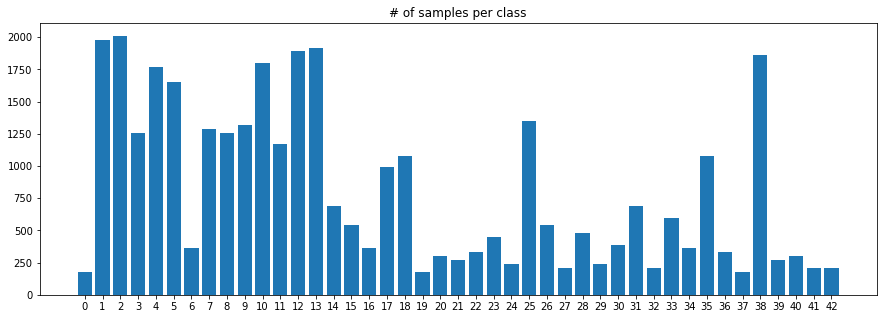

In [5]:
### Data exploration visualization
def display_bar_chart(x, height):
    """ Displays a bar chart"""
    plt.figure(figsize=(15,5))
    plt.bar(x, height, align='center', tick_label=x)
    plt.title('# of samples per class')
    plt.show()

def display_class_distribution(samples, labels):
    """ Displays a bar chart showing the distribution of samples among classes.
    Args: 
        samples:
        labels:
    """
    classes = sorted(set(labels))
    counts = []
    for label in classes:
        num_samples_with_label = (labels==label).sum()
        counts.append(num_samples_with_label)
    display_bar_chart(classes, counts)
    

display_class_distribution(X_train, y_train)

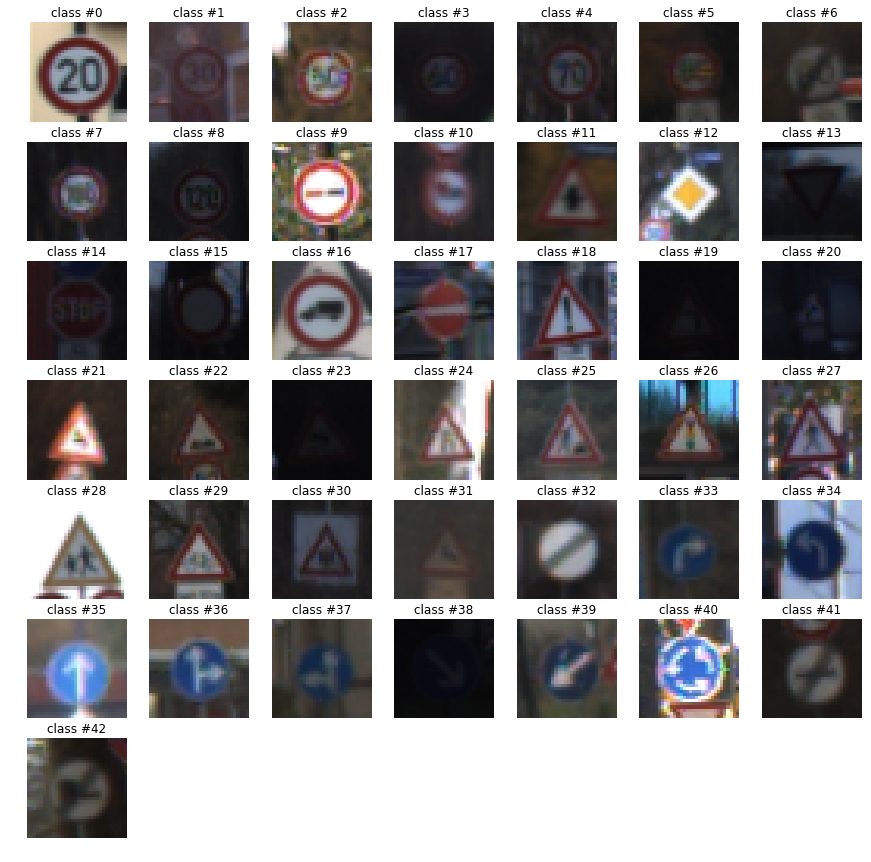

In [6]:
def display_classes(samples, labels):
    """Displays one image with a class label for each class.
    Args:
        samples: 
        labels:
    """
    unique_labels = sorted(set(labels))
    num_labels = len(unique_labels)
    grid_size = math.ceil(math.sqrt(num_labels))
    plt.figure(figsize=(15, 15))
    for i, label in enumerate(unique_labels):
        # retrieve the first few images for this label
        first_sample_index = np.where(labels==label)[0][0]
        img = samples[first_sample_index]
        plt.subplot(grid_size, grid_size, i+1)  # grid index starting at 1
        plt.imshow(img)
        #plt.title("c{0} - {1}".format(label, get_class_name_for_label(label)))
        plt.title("class #{0}".format(label))
        plt.axis('off')
    plt.show()

display_classes(X_train, y_train)

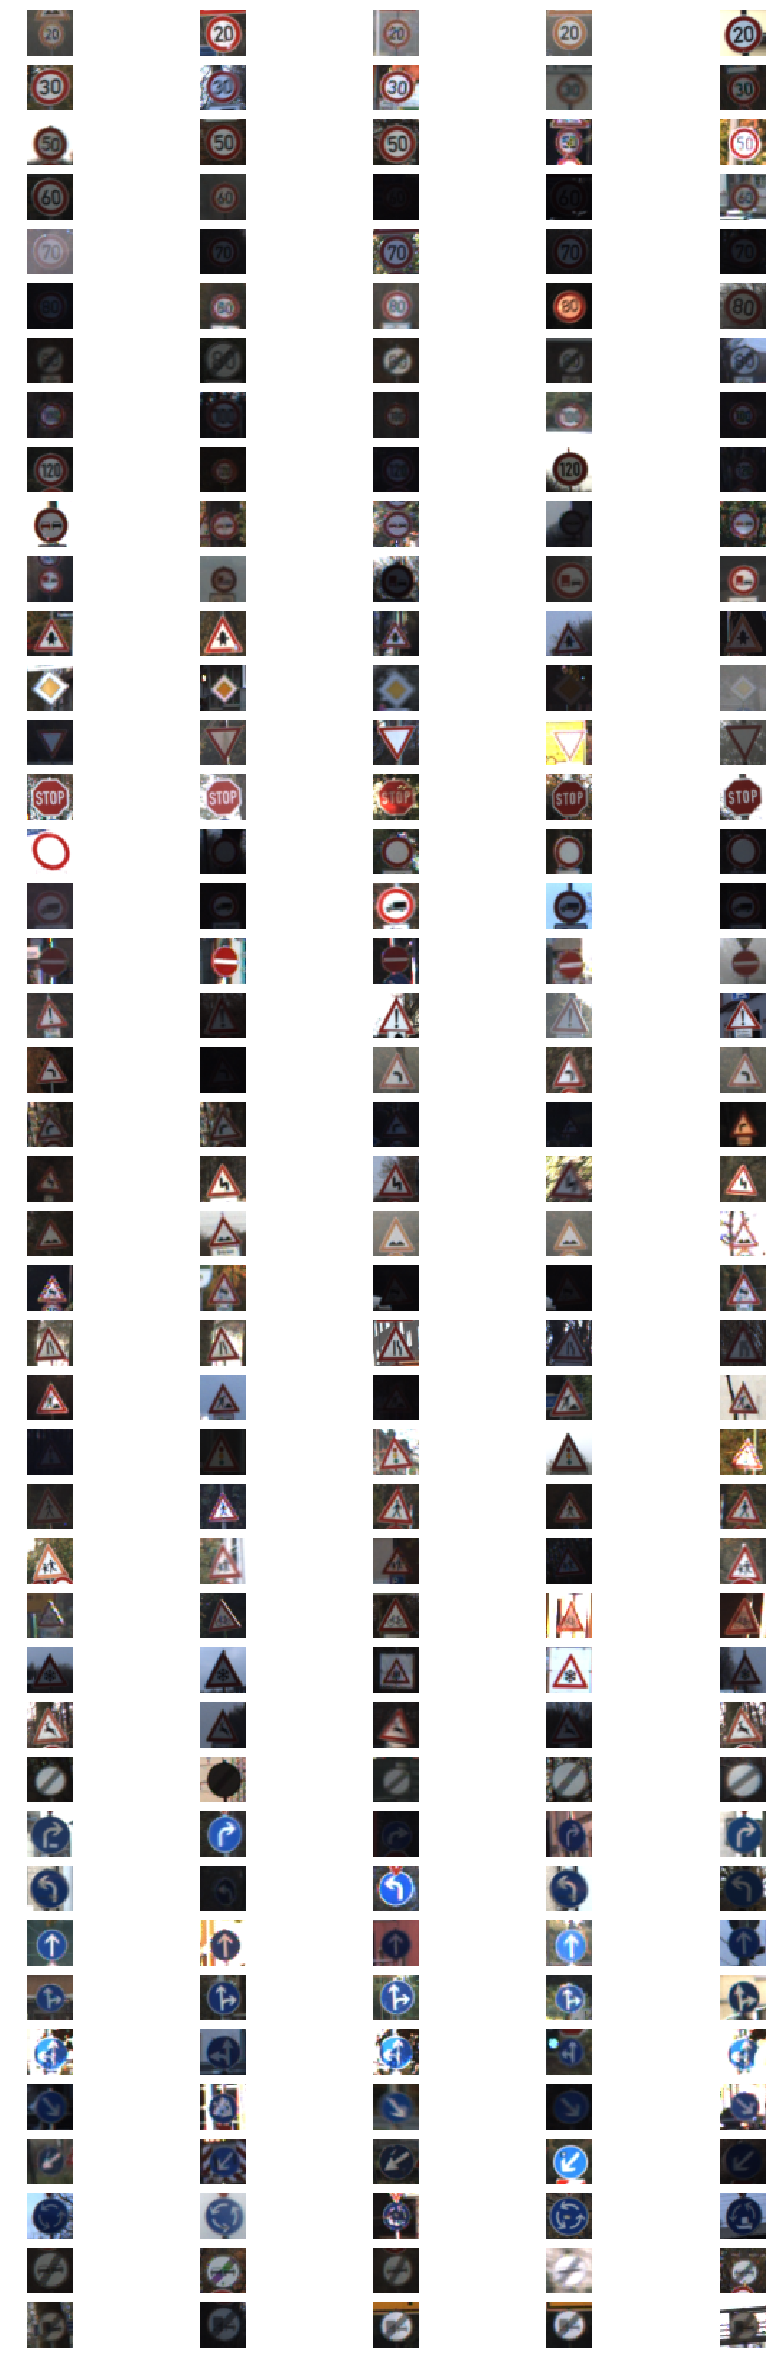

In [7]:
def display_random_samples_for_each_label(samples, labels, num_display=5):
    """Displays "num_display" randomly selected samples in a row for each label.
    Args:
        samples: 
        labels:
        num_display: the number of samples to display for each unique label
    """
    unique_labels = sorted(set(labels))
    num_labels = len(unique_labels)
    plt.figure(figsize=(15, num_labels))
    for i, label in enumerate(unique_labels):
        # retrieve the first few images for this label
        samples_indices = np.where(labels==label)[0]
        np.random.shuffle(samples_indices)
        samples_indices = samples_indices[0:num_display]        
        for j in range(0, num_display):
            img = samples[samples_indices[j]]
            grid_index = i * num_display + j 
            plt.subplot(num_labels, num_display, grid_index+1)  # grid index starting at 1
            plt.imshow(img)
            plt.axis('off')
    plt.show()

display_random_samples_for_each_label(X_train, y_train)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
import tensorflow as tf
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [9]:
### Preprocess the data. 
### Convert to float, and normalize each pixel value between -1:1
X_train = (X_train.astype('float32') -128.0)/128.0
X_test = (X_test.astype('float32') -128.0)/128.0
X_valid = (X_valid.astype('float32') -128.0)/128.0

In [10]:
### Data Augmentation
training_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest'
    )
prediction_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True)


# Create a datagenerator which will be capable of producing augmented samples.
# To do this, fit a new generator on the training data. 
# ie: compute quantities required for featurewise normalization
training_datagen.fit(X_train)
prediction_datagen.fit(X_train)

### Model Architecture

In [11]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, GlobalAveragePooling2D, Activation, Conv2D, BatchNormalization

### Define CNN architecture
def all_conv_net(height, width, num_channels, num_classes):
    model = Sequential()

    model.add(Conv2D(96, (3, 3), padding='same', activation='relu', input_shape=(height, width, num_channels)))
    model.add(Conv2D(96, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(96, (3, 3), padding='same', strides=(2,2)))
    #model.add(Dropout(0.5))
    model.add(BatchNormalization())
    
    model.add(Conv2D(192, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(192, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(192, (3, 3), padding='same', strides=(2,2)))
    #model.add(Dropout(0.5))
    model.add(BatchNormalization())

    model.add(Conv2D(192, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(192, (1, 1), padding='valid', activation='relu'))
    model.add(Conv2D(num_classes, (1, 1), padding='valid'))
    
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    return model


### Create model
model = all_conv_net(image_shape[0], image_shape[1], image_shape[2], n_classes)
model.summary()

### Create optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        83040     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 96)        384       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 192)       166080    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 192)       331968    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 192)         331968    
__________

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [13]:
from tensorflow.python.keras.utils import to_categorical
# Train the model
batch_size = 32
num_epochs = 8
steps_per_epoch = 2*n_train/batch_size

# Create one-hot versions of the labels
y_train_one_hot = to_categorical(y_train, num_classes=n_classes)
y_valid_one_hot = to_categorical(y_valid, num_classes=n_classes)

# Create batch generators to generate batches of pre-processed samples
train_batch_generator = training_datagen.flow(X_train, y_train_one_hot, batch_size=batch_size)
validation_batch_generator = prediction_datagen.flow(X_valid, y_valid_one_hot, batch_size=batch_size)

# fits the model on batches with real-time data augmentation
history = model.fit_generator(
    train_batch_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=num_epochs,
    validation_data=validation_batch_generator,
    validation_steps=n_validation/batch_size)

Epoch 1/8
2175/2174 [==============================] - 57s - loss: 1.2735 - acc: 0.6287 - val_loss: 0.2811 - val_acc: 0.9227
Epoch 2/8
2175/2174 [==============================] - 54s - loss: 0.0871 - acc: 0.9729 - val_loss: 0.3063 - val_acc: 0.9438
Epoch 3/8
2175/2174 [==============================] - 53s - loss: 0.0483 - acc: 0.9860 - val_loss: 0.1254 - val_acc: 0.9680
Epoch 4/8
2175/2174 [==============================] - 52s - loss: 0.0376 - acc: 0.9892 - val_loss: 0.1199 - val_acc: 0.9746
Epoch 5/8
2175/2174 [==============================] - 52s - loss: 0.0257 - acc: 0.9928 - val_loss: 0.1085 - val_acc: 0.9769
Epoch 6/8
2175/2174 [==============================] - 52s - loss: 0.0217 - acc: 0.9939 - val_loss: 0.0708 - val_acc: 0.9828
Epoch 7/8
2175/2174 [==============================] - 52s - loss: 0.0207 - acc: 0.9942 - val_loss: 0.1118 - val_acc: 0.9834
Epoch 8/8
2175/2174 [==============================] - 52s - loss: 0.0166 - acc: 0.9952 - val_loss: 0.1053 - val_acc: 0.9837


Final Training Accuracy: 0.9952419285283041
Final Validation Accuracy: 0.9836734693877551


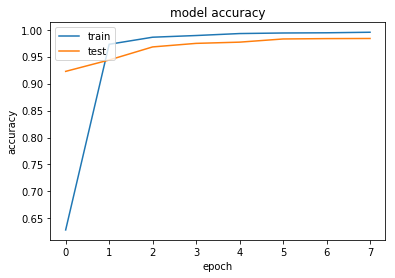

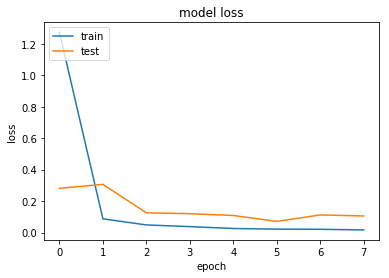

In [14]:
### Calculate and report the accuracy on the training and validation set
print("Final Training Accuracy: {0}".format(history.history['acc'][-1]))
print("Final Validation Accuracy: {0}".format(history.history['val_acc'][-1]))

# plot accuracy history for both training and validation on same graph
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# ploy loss for both training and validation on same graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
### Evaluate the test set
y_test_one_hot = to_categorical(y_test, num_classes=n_classes)
test_batch_generator = prediction_datagen.flow(X_test, y_test_one_hot, batch_size=n_test)

for bx, by in test_batch_generator:
    batch_results = model.evaluate(bx, by)
    print("\nFinal Test Accuracy: {1}", batch_results[1])
    break

12576/12630 [============================>.] - ETA: 0s
Final Test Accuracy: {1} 0.980285035629


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
from skimage import io

file_paths = glob.glob("new_images/*.jpg")
num_files = len(file_paths)

imgs = np.zeros((num_files, 32, 32 ,3), dtype='uint8')
image_labels = np.zeros((num_files))

for i, file_path in enumerate(file_paths):
    image_labels[i] = int(os.path.splitext(os.path.basename(file_path))[0])
    imgs[i,:,:,:] = io.imread(file_path)

### Predict the Sign Type for Each Image + Top 5 Softmax Probabilities For Each Image

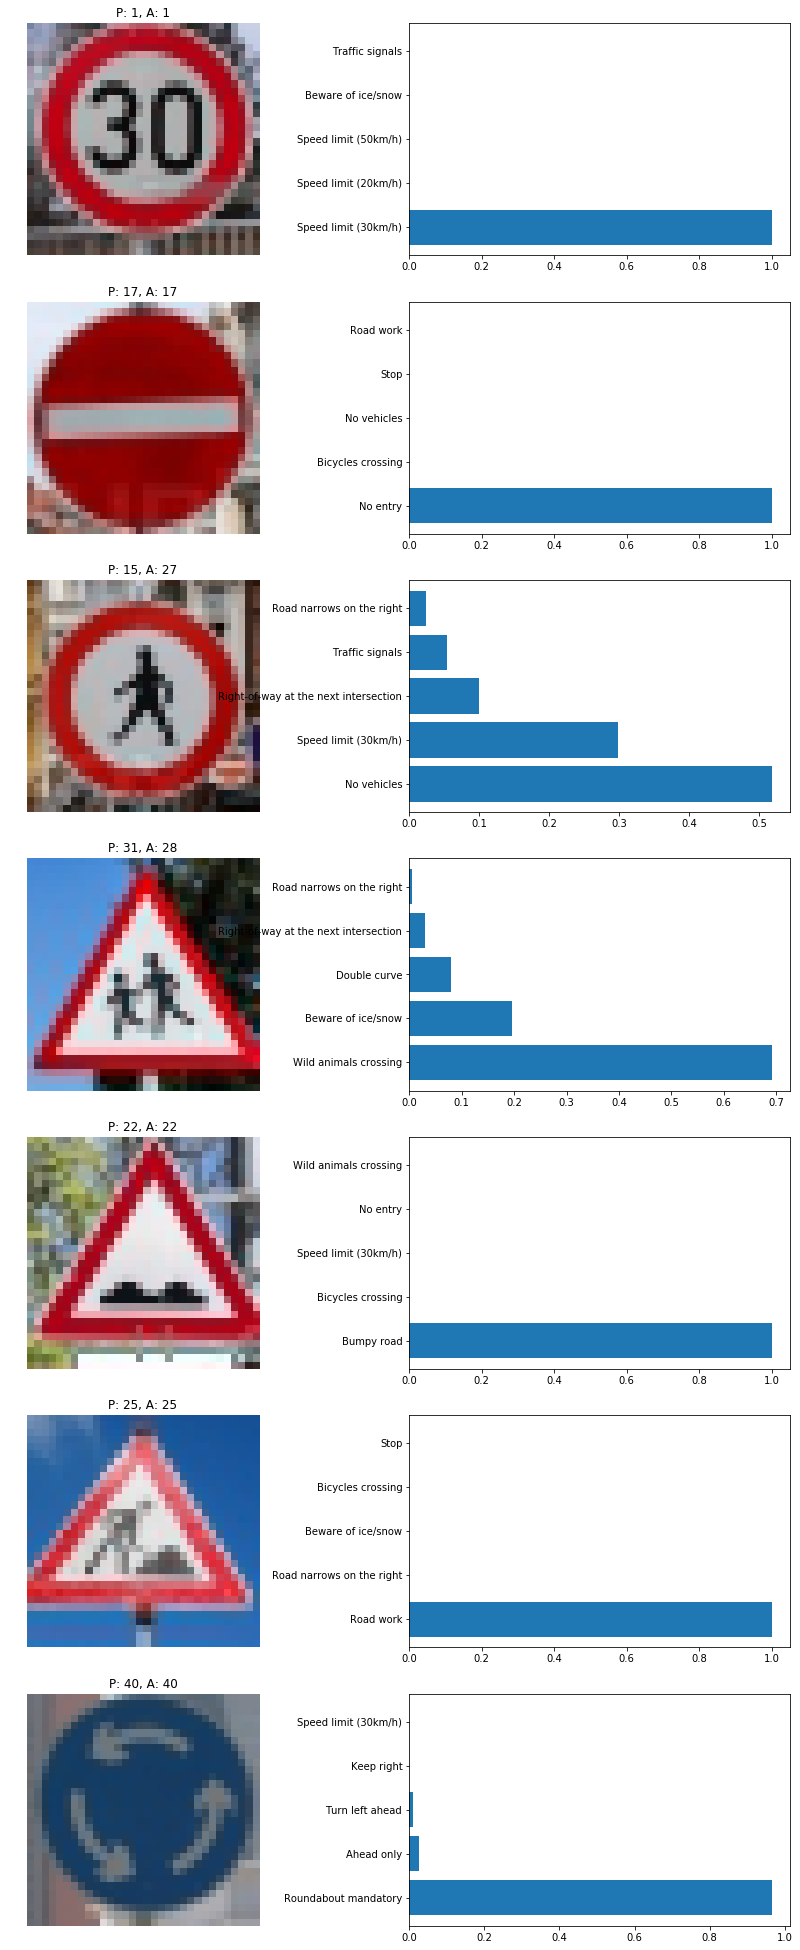

In [20]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
# normalize the images
X_new = (imgs.astype('float32') -128.0)/128.0
y_new_one_hot = to_categorical(image_labels)


plt.figure(figsize=(15, 5*num_files))
for bx, by in prediction_datagen.flow(X_new, y_new_one_hot, batch_size=num_files):
    probabilities = model.predict(bx)
    predictions = np.argmax(probabilities, axis=1)
    for i in range(0, num_files):
        top_5_indices = probabilities[i].argsort()[-5:][::-1]
        top_5_probs = probabilities[i][top_5_indices]
        top_5_labels= [get_class_name_for_label(j) for j in top_5_indices]
        
        predicted_label = predictions[i]
        actual_label = np.argmax(by[i])

        plt.subplot(num_files, 2, 2*i+1) # grid index starting at 1
        plt.imshow(io.imread(os.path.join('new_images', '{0}.jpg'.format(actual_label))))
        plt.title("P: {0}, A: {1}".format(predicted_label, actual_label))
        plt.axis('off')

        plt.subplot(num_files, 2, 2*i+2) # grid index starting at 1
        plt.barh(np.arange(1,6,1), top_5_probs)
        plt.yticks(np.arange(1, 6, 1), top_5_labels)
    break
plt.show()

### Analyze Performance

In [ ]:
### The network accurately predicted labels for only 5 of the 7 new images... an accuracy of ~71.4% 
# The network is 100% confident in the accurate predictions. However, the 2 inaccurate predictions,
# both of which involve pedestrians, have mixed predicted distributions.